# Linear Regression DEMO1

## Sklearn電力預測

- ref: https://developer.aliyun.com/article/412988
- ref: https://www.cnblogs.com/pinard/p/6016029.html?spm=a2c6h.12873639.article-detail.9.4cba721fOHnCCO
- 數據下載連結: https://archive.ics.uci.edu/ml/machine-learning-databases/00294/

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [3]:
!pip install openpyxl

     ------------------------------------- 250.0/250.0 kB 45.9 kB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [5]:
data = pd.read_excel('./CCPP/Folds5x2_pp.xlsx')

## 資料說明:
- UCI的說明: http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
- Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

### Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [6]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [8]:
data.shape

(9568, 5)

In [9]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [10]:
y = data[['PE']]
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


## 整理訓練資料 & 測試資料

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [13]:
2392/(7176+2392) # --> 3:1

0.25

## 載入模型 & 訓練
```python
#1. 載入模型
from sklearn.linear_model import LinearRegression
#2. 建立模型
regr = LinearRegression()
#3. 訓練模型
regr.fit(x_train, y_train)
#4. 使用模型來做預測
regr.predict([[1.3]])
```

In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [15]:
print(linreg.intercept_)
print(linreg.coef_)

[460.05727267]
[[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


```
PE=460.05727267-1.96865472∗AT-0.2392946∗V+0.0568509∗AP-0.15861467∗RH 
```

### y = c0 + c1x1 + c2x2 +.....

## 使用 or 測試模型

In [16]:
y_pred = linreg.predict(X_test)

In [17]:
y_pred

array([[457.26722361],
       [466.70748375],
       [440.33763981],
       ...,
       [457.39596168],
       [429.37990249],
       [438.16837983]])

### 確認效果
- MSE: Mean Squared Error
    - ref: https://zh.wikipedia.org/zh-tw/%E5%9D%87%E6%96%B9%E8%AF%AF%E5%B7%AE
- RMSE: Root Mean Squared Error
- 這兩個指標在應用上越小越好

In [18]:
from sklearn import metrics

# MSE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE:  20.837191547220343
RMSE:  4.564777272465804


In [19]:
y_test.max()

PE    495.24
dtype: float64

In [20]:
y_test.min()

PE    420.26
dtype: float64

In [21]:
(y_test.max()-y_test.min())

PE    74.98
dtype: float64

In [22]:
4.56/(y_test.max()-y_test.min())*100

PE    6.081622
dtype: float64

## 畫出圖來看看

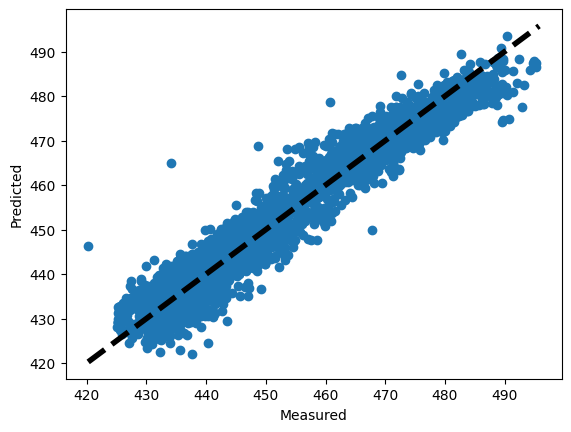

In [23]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) #lw: linewidth
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

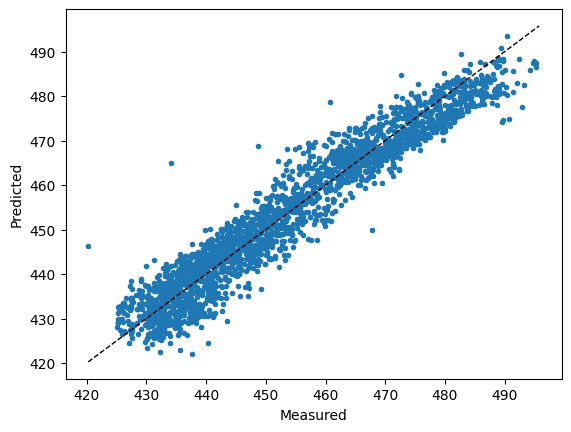

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, marker='.')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1) #lw: linewidth
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

為什麼我們不使用x, y來畫這張圖?
```
X_test vs y_test
X_test vs y_pred
```

## 如果我們用比較少的參數做預測
- [AT, V, AP, RH] --> 取['AT', 'V', 'AP']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print("MSE:",metrics.mean_squared_error(y_test, y_pred))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 23.9056537995278
RMSE: 4.889340834870055


In [28]:
my_test = [10, 20, 30, 40, 50]
my_pred = [11, 22, 33, 41, 51]
metrics.mean_squared_error(my_test, my_pred)

3.2

In [30]:
((11-10)**2 + (22-20)**2 + (33-30)**2 + (41-40)**2 + (51-50)**2)/5

3.2

In [32]:
np.sqrt(metrics.mean_squared_error(my_test, my_pred))

1.7888543819998317

In [34]:
( ((11-10)**2 + (22-20)**2 + (33-30)**2 + (41-40)**2 + (51-50)**2)/5 )**0.5

1.7888543819998317

#### TODO: 用不同的組合試試

- 請給出 ['AT', 'V', 'RH'] 的結果
- 請給出 ['AT', 'V'] 的結果
- 請給出 ['V', 'AP', 'RH'] 的結果
- 你觀察出什麼?

## 畫出圖來看看

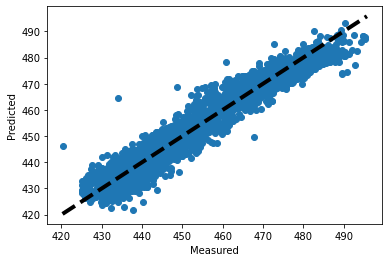

In [37]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) #lw: linewidth
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

----
## k-folder for predict
- ref: https://scikit-learn.org/stable/modules/cross_validation.html

In [53]:
from sklearn.model_selection import cross_val_predict

X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]

predicted = cross_val_predict(linreg, X, y, cv=10)

print("MSE: ", metrics.mean_squared_error(y, predicted))

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE:  20.793672509857537
RMSE:  4.560007950635343


In [61]:
from sklearn.model_selection import cross_val_predict

X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]

predicted = cross_val_predict(linreg, X, y, cv=7)

print("MSE: ", metrics.mean_squared_error(y, predicted))

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE:  20.786085838457392
RMSE:  4.559176004329882


### 畫圖視覺化

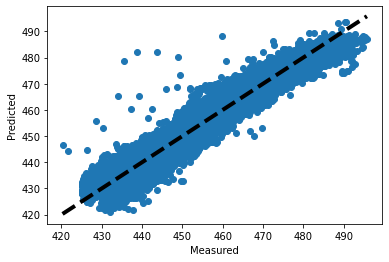

In [62]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()